# PROJECTS

### BIBLIOTECA

In [59]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# Load the dataset
url = "https://raw.githubusercontent.com/paolasouza/data_mining_and_big_data/ec70f701a784820fa6ca326c0d51d8740028da03/projects.csv"
dados = pd.read_csv(url)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [47]:
x = dados[["expected_hours","price"]] #features

In [48]:
y = dados["unfinished"] # classes
y.head()

0    1
1    1
2    1
3    1
4    1
Name: unfinished, dtype: int64

In [49]:
dados.shape

(2157, 3)

## Classificação Binária

- CLASSES (Y) -> BOUGHT (1/0) -> CLASSIFICAÇÃO BINÁRIA

- FREATURE NÃO DEFINE SE CLASSIFICAÇÃO É BINÁRIA

In [50]:
x = dados[["expected_hours","price"]] #features
y = dados["unfinished"] # classes

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 5 # pode ser qualquer valor fixo
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#CLASSIFICADOR
modelo = SVC(gamma = "auto") # cria um modelo
modelo.fit(treino_x, treino_y) #treina

previsoes = modelo.predict(teste_x) # teste
acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores

acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)



Treinamento com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.44%
A acurácia foi 59.44%


## Comparação Acurácia Dummy

In [52]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 52.59%


## Plotando Gráfico

<Axes: xlabel='expected_hours', ylabel='price'>

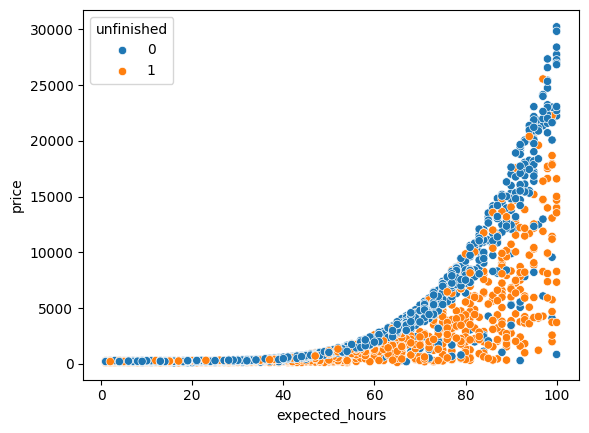

In [53]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", hue=y, data=dados)


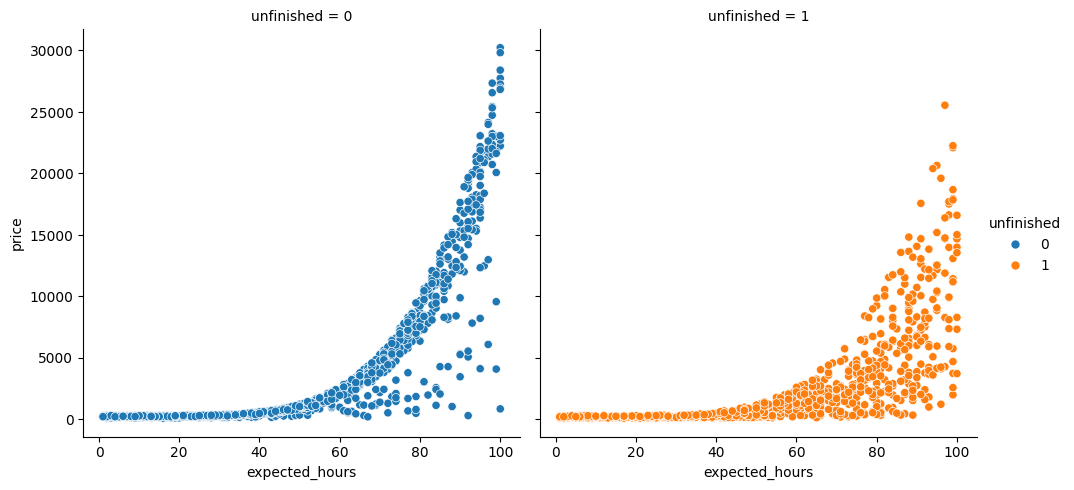

In [54]:
sns.relplot(x="expected_hours", y="price", hue="unfinished", col = "unfinished", data=dados)

In [55]:
dados.unfinished.value_counts()

unfinished
0    1134
1    1023
Name: count, dtype: int64

<Axes: xlabel='expected_hours', ylabel='price'>

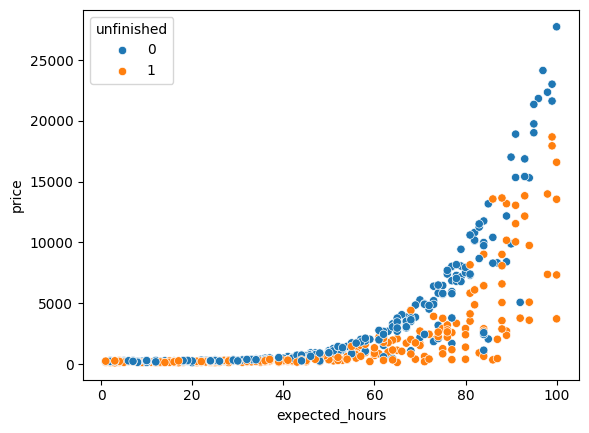

In [56]:
sns.scatterplot(x="expected_hours", y="price", hue=teste_y, data=teste_x)

1 100 101 27738


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


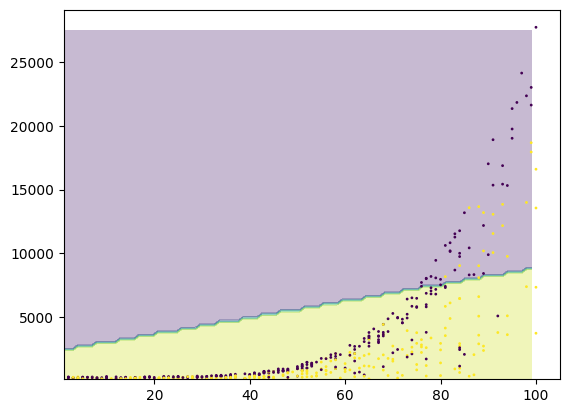

In [57]:
import numpy as np

x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()
y_min = teste_x.price.min()
y_max = teste_x.price.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1)


# DECISION BOUNDARY


1 100 101 27738


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


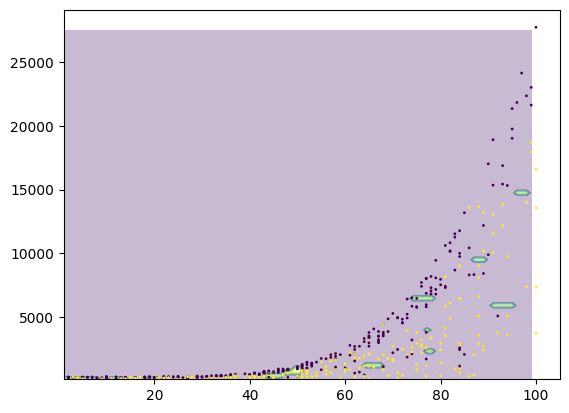

In [60]:
import numpy as np

x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()
y_min = teste_x.price.min()
y_max = teste_x.price.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1)


# DECISION BOUNDARY


## StandardScaler

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 5 # pode ser qualquer valor fixo
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

#CLASSIFICADOR
modelo = SVC(gamma = "auto") # cria um modelo
modelo.fit(treino_x, treino_y) #treina


previsoes = modelo.predict(teste_x) # teste
acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores

acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)



Treinamento com 1617 elementos e testaremos com 540 elementos


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


A acurácia foi 67.22%
A acurácia foi 67.22%


-1.7254653394909152 1.7343040461144184 -0.6091339077205677 4.825140926925731


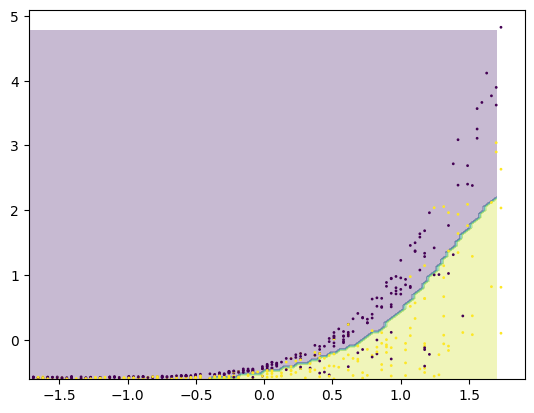

In [90]:
import numpy as np

data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


# DECISION BOUNDARY


## Comparação acurácia Dummy

In [91]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 52.59%


-1.7254653394909152 1.7343040461144184 -0.6091339077205677 4.825140926925731


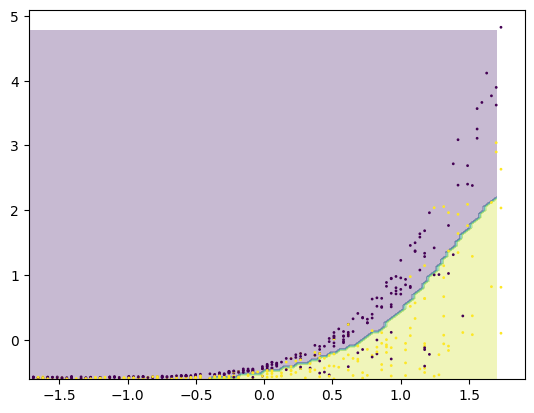

In [92]:
import numpy as np

data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


# DECISION BOUNDARY
# DECISION BOUNDARY

In [93]:
projeto = [[100,200]]
projeto = scaler.transform(projeto)
projeto

array([[ 1.73430405, -0.5896675 ]])

In [94]:
modelo.predict(projeto)

array([1])